In [ ]:
!pip install keras-tcn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 22.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tcn import TCN, tcn_full_summary
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from numpy.random import seed
seed(1052023)
from random import randrange
scaler = MinMaxScaler()

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_excel("DJIA Realized Volatility.xlsx",index_col='Date',parse_dates=True)
df_for_date=df[int(len(df['Realised'])*0.7):].reset_index()



In [ ]:
n_inputs = [21,63,84,126,189,252]
n_neurons = [14,42,56,84,126,168]
dilations = [[1,2,1],[1,2,2,1],[1,2,4,1],[1,2,2,2,1],[1,2,4,2,1],[1,2,4,4,1]]
kernel_size=[2,3,4,6]
epochs=[1,3,5,7,10,15]
dropouts=[0,0.2,0.4]
losses=['mse','mae','huber_loss']
RMSE = []
Accuracy = []

# Hyperparameters search

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(6)
    n=randrange(3)
    o=randrange(2)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df.iloc[int(len(df['Realised'])*0.7):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(TCN(kernel_size=kernel_size[k], dilations=dilations[i], nb_stacks=1,padding='causal',
                      dropout_rate=dropouts[l],activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[n], metrics=["accuracy", "mean_absolute_error"])
    model.fit(generator,epochs=epochs[m])
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[m]} | Inputs: {n_inputs[i]} | Kernel: {kernel_size[k]} | Dropout: {dropouts[l]} | Loss: {losses[n]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/5
107/107 [==============================] - 19s 8ms/step - loss: 0.1047 - accuracy: 0.0000e+00 - mean_absolute_error: 0.2740
Epoch 2/5
107/107 [==============================] - 1s 9ms/step - loss: 0.0132 - accuracy: 5.8411e-04 - mean_absolute_error: 0.1008
Epoch 3/5
107/107 [==============================] - 1s 11ms/step - loss: 0.0082 - accuracy: 2.9206e-04 - mean_absolute_error: 0.0774
Epoch 4/5
107/107 [==============================] - 1s 11ms/step - loss: 0.0052 - accuracy: 2.9206e-04 - mean_absolute_error: 0.0631
Epoch 5/5
1/1 [==============================] - 0s 21ms/step
Epoch: 5 | Inputs: 84 | Kernel: 2 | Dropout: 0.2 | Loss: huber_loss
RMSE: 0.0021249528870122348 | Accuracy: 66.56444677671034
Epoch 1/15
107/107 [==============================] - 6s 11ms/step - loss: 0.2182 - accuracy: 2.9206e-04 - mean_absolute_error: 0.1941
Epoch 2/15
107/107 [==============================] - 1s 8ms/step - loss: 0.0084 - accuracy: 5.8411e-04 - mean_absolute_error: 0.0591
Epoch 3/

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(6)
    n=randrange(3)
    o=randrange(2)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df.iloc[int(len(df['Realised'])*0.7):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(TCN(kernel_size=kernel_size[k], dilations=dilations[i], nb_stacks=1,padding='causal',
                      dropout_rate=dropouts[l],activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[n], metrics=["accuracy", "mean_absolute_error"])
    model.fit(generator,epochs=epochs[m])
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[m]} | Inputs: {n_inputs[i]} | Kernel: {kernel_size[k]} | Dropout: {dropouts[l]} | Loss: {losses[n]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/3
109/109 [==============================] - 5s 8ms/step - loss: 0.1234 - accuracy: 2.8678e-04 - mean_absolute_error: 0.1234
Epoch 2/3
109/109 [==============================] - 1s 7ms/step - loss: 0.0481 - accuracy: 2.8678e-04 - mean_absolute_error: 0.0481
Epoch 3/3
1/1 [==============================] - 0s 22ms/step
Epoch: 3 | Inputs: 21 | Kernel: 2 | Dropout: 0.2 | Loss: mae
RMSE: 0.0019709481489740984 | Accuracy: 66.2771877609859
Epoch 1/7
109/109 [==============================] - 4s 9ms/step - loss: 0.1112 - accuracy: 2.8678e-04 - mean_absolute_error: 0.1112
Epoch 2/7
109/109 [==============================] - 1s 8ms/step - loss: 0.0389 - accuracy: 2.8678e-04 - mean_absolute_error: 0.0389
Epoch 3/7
109/109 [==============================] - 1s 7ms/step - loss: 0.0356 - accuracy: 2.8678e-04 - mean_absolute_error: 0.0356
Epoch 4/7
109/109 [==============================] - 1s 10ms/step - loss: 0.0350 - accuracy: 2.8678e-04 - mean_absolute_error: 0.0350
Epoch 5/7
109/109 [==

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(6)
    n=randrange(3)
    o=randrange(2)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df.iloc[int(len(df['Realised'])*0.7):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(TCN(kernel_size=kernel_size[k], dilations=dilations[i], nb_stacks=1,padding='causal',
                      dropout_rate=dropouts[l],activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[n], metrics=["accuracy", "mean_absolute_error"])
    model.fit(generator,epochs=epochs[m])
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[m]} | Inputs: {n_inputs[i]} | Kernel: {kernel_size[k]} | Dropout: {dropouts[l]} | Loss: {losses[n]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/15
107/107 [==============================] - 6s 8ms/step - loss: 0.2453 - accuracy: 2.9206e-04 - mean_absolute_error: 0.2453
Epoch 2/15
107/107 [==============================] - 1s 8ms/step - loss: 0.0471 - accuracy: 2.9206e-04 - mean_absolute_error: 0.0471
Epoch 3/15
107/107 [==============================] - 1s 8ms/step - loss: 0.0393 - accuracy: 2.9206e-04 - mean_absolute_error: 0.0393
Epoch 4/15
107/107 [==============================] - 1s 8ms/step - loss: 0.0372 - accuracy: 2.9206e-04 - mean_absolute_error: 0.0372
Epoch 5/15
107/107 [==============================] - 1s 8ms/step - loss: 0.0356 - accuracy: 2.9206e-04 - mean_absolute_error: 0.0356
Epoch 6/15
107/107 [==============================] - 1s 8ms/step - loss: 0.0345 - accuracy: 2.9206e-04 - mean_absolute_error: 0.0345
Epoch 7/15
107/107 [==============================] - 1s 8ms/step - loss: 0.0339 - accuracy: 2.9206e-04 - mean_absolute_error: 0.0339
Epoch 8/15
107/107 [==============================] - 1s 9ms/s

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(6)
    n=randrange(3)
    o=randrange(2)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df.iloc[int(len(df['Realised'])*0.7):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(TCN(kernel_size=kernel_size[k], dilations=dilations[i], nb_stacks=1,padding='causal',
                      dropout_rate=dropouts[l],activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[n], metrics=["accuracy", "mean_absolute_error"])
    model.fit(generator,epochs=epochs[m])
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[m]} | Inputs: {n_inputs[i]} | Kernel: {kernel_size[k]} | Dropout: {dropouts[l]} | Loss: {losses[n]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/10
109/109 [==============================] - 5s 10ms/step - loss: 0.2057 - accuracy: 2.8678e-04 - mean_absolute_error: 0.2057
Epoch 2/10
109/109 [==============================] - 1s 8ms/step - loss: 0.0440 - accuracy: 2.8678e-04 - mean_absolute_error: 0.0440
Epoch 3/10
109/109 [==============================] - 1s 7ms/step - loss: 0.0380 - accuracy: 2.8678e-04 - mean_absolute_error: 0.0380
Epoch 4/10
109/109 [==============================] - 1s 7ms/step - loss: 0.0365 - accuracy: 2.8678e-04 - mean_absolute_error: 0.0365
Epoch 5/10
109/109 [==============================] - 1s 7ms/step - loss: 0.0354 - accuracy: 2.8678e-04 - mean_absolute_error: 0.0354
Epoch 6/10
109/109 [==============================] - 1s 7ms/step - loss: 0.0348 - accuracy: 2.8678e-04 - mean_absolute_error: 0.0348
Epoch 7/10
109/109 [==============================] - 1s 7ms/step - loss: 0.0342 - accuracy: 2.8678e-04 - mean_absolute_error: 0.0342
Epoch 8/10
109/109 [==============================] - 1s 7ms/

Epoch: 10 | Inputs: 84 | Kernel: 6 | Dropout: 0.2 | Loss: mae
RMSE: 0.002041711971883923 | Accuracy: 66.77923972839832

# H=1 Forecasts

In [ ]:
Accuracy=[]
RMSE=[]
Quasilikelihood=[]

In [ ]:
for m in range (14):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 2
  n_input = 84
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=6, dilations=[1,2,4,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=10)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(len(test)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Streaminguitvoer ingekort tot de laatste 5000 regels.
1/1 [==============================] - 0s 33ms/step
Epoch 1/10
126/126 [==============================] - 7s 11ms/step - loss: 0.1390 - accuracy: 2.4950e-04 - mean_absolute_error: 0.1390
Epoch 2/10
126/126 [==============================] - 1s 11ms/step - loss: 0.0373 - accuracy: 2.4950e-04 - mean_absolute_error: 0.0373
Epoch 3/10
126/126 [==============================] - 1s 11ms/step - loss: 0.0331 - accuracy: 2.4950e-04 - mean_absolute_error: 0.0331
Epoch 4/10
126/126 [==============================] - 2s 13ms/step - loss: 0.0318 - accuracy: 4.9900e-04 - mean_absolute_error: 0.0318
Epoch 5/10
126/126 [==============================] - 2s 12ms/step - loss: 0.0321 - accuracy: 2.4950e-04 - mean_absolute_error: 0.0321
Epoch 6/10
126/126 [==============================] - 1s 11ms/step - loss: 0.0304 - accuracy: 2.4950e-04 - mean_absolute_error: 0.0304
Epoch 7/10
126/126 [==============================] - 1s 11ms/step - loss: 0.0296 - 

In [ ]:
Accuracy

[65.48202651792704,
 64.87598924853893,
 64.52960080355405,
 63.97556386371805,
 63.07966520069409,
 64.4841010110001,
 67.15557918041378,
 63.800232078429985,
 65.4620041758484,
 63.27890058884073,
 62.101202557670355,
 65.83644642888122,
 67.412919999665,
 62.18323206715224,
 64.82179193737608]

In [ ]:
RMSE

[0.0025686241564243455,
 0.0025047597276590746,
 0.0025378011993582887,
 0.0026037249079068985,
 0.002509544455949887,
 0.0025041440005006753,
 0.0025152275013915434,
 0.002611053443787844,
 0.002551798650758124,
 0.002542456026272199,
 0.0025458067333182376,
 0.0024736712280994237,
 0.002657157947665294,
 0.0025326424528479886,
 0.0025210814126907653]

In [ ]:
Quasilikelihood



[0.0921992795680408,
 0.09026446923750575,
 0.09348430340902168,
 0.09650951799037975,
 0.09515106365909563,
 0.09171172909542097,
 0.0849682117381041,
 0.09888446081777388,
 0.0910420448426327,
 0.09610514780831714,
 0.09841498063931028,
 0.08638993597375466,
 0.08836240169078209,
 0.10008245118449396,
 0.09283424442875517]

Text(0, 0.5, 'DJIA Realized Volatility')

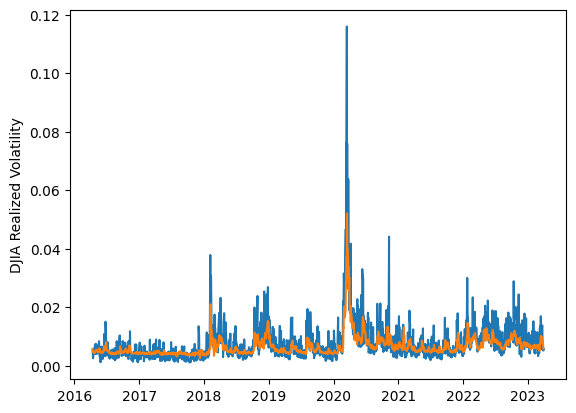

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("DJIA Realized Volatility")

# H=3 Forecasts

In [ ]:
Accuracy=[]
RMSE=[]
Quasilikelihood=[]

In [ ]:
for m in range (13):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 2
  n_input = 84
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=6, dilations=[1,2,4,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(3))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=10)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(int(len(test)/3)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,3:,:],[a[j*3:(j+1)*3]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  true_predictions=true_predictions.reshape(1755,1)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Streaminguitvoer ingekort tot de laatste 5000 regels.
1/1 [==============================] - 0s 23ms/step
Epoch 1/10
126/126 [==============================] - 6s 11ms/step - loss: 0.0855 - accuracy: 0.3550 - mean_absolute_error: 0.0855
Epoch 2/10
126/126 [==============================] - 2s 12ms/step - loss: 0.0341 - accuracy: 0.3331 - mean_absolute_error: 0.0341
Epoch 3/10
126/126 [==============================] - 2s 15ms/step - loss: 0.0323 - accuracy: 0.3476 - mean_absolute_error: 0.0323
Epoch 4/10
126/126 [==============================] - 2s 13ms/step - loss: 0.0323 - accuracy: 0.3508 - mean_absolute_error: 0.0323
Epoch 5/10
126/126 [==============================] - 1s 12ms/step - loss: 0.0311 - accuracy: 0.4366 - mean_absolute_error: 0.0311
Epoch 6/10
126/126 [==============================] - 1s 11ms/step - loss: 0.0308 - accuracy: 0.3972 - mean_absolute_error: 0.0308
Epoch 7/10
126/126 [==============================] - 1s 10ms/step - loss: 0.0307 - accuracy: 0.4643 - mean_

In [ ]:
RMSE

[0.002658159590649982,
 0.002581761995548651,
 0.0026957940540398035,
 0.002660941460671089,
 0.0026425329544289508,
 0.002598526122736367,
 0.0026591081871269015,
 0.002583928373069934,
 0.0025905997164718205,
 0.002641358477883772,
 0.0026620550466639765,
 0.0026057018014445043,
 0.002592603160197214,
 0.00269963351699769,
 0.00268277915096478]

In [ ]:
Accuracy

[58.05513653613883,
 64.89393135293169,
 61.22262040311861,
 62.43231306485144,
 62.50223602399858,
 62.051342603414184,
 58.8474499121163,
 63.949479984575206,
 61.19006297210004,
 61.51848381358991,
 64.08792493656182,
 63.41680146526456,
 62.720039463672265,
 63.4531997771352,
 62.0626101542271]

In [ ]:
Quasilikelihood

[0.11652995491113155,
 0.09470305841298506,
 0.10810677248482936,
 0.1046105795748534,
 0.10083031458647253,
 0.10158243076610322,
 0.11387197638026364,
 0.09624824398339196,
 0.10479783819012178,
 0.10626184938376476,
 0.09922184982117754,
 0.09872966655546123,
 0.102188199003224,
 0.10377616732022459,
 0.10256438516580649]

Text(0, 0.5, 'DJIA Realized Volatility')

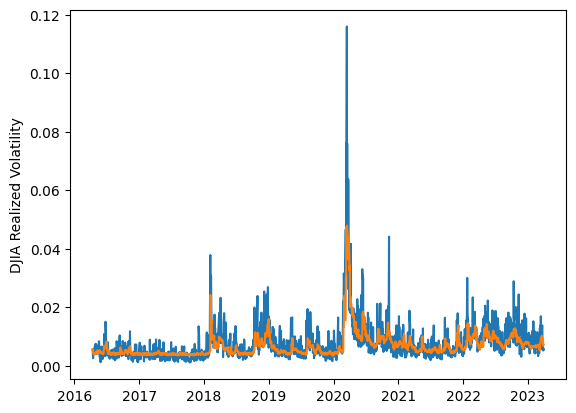

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("DJIA Realized Volatility")

# H=5 Forecasts

In [ ]:
Accuracy=[]
RMSE=[]
Quasilikelihood=[]

In [ ]:
for m in range (14):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 2
  n_input = 84
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=6, dilations=[1,2,4,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(5))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=10)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(int(len(test)/5)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,5:,:],[a[j*5:(j+1)*5]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  true_predictions=true_predictions.reshape(1755,1)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Streaminguitvoer ingekort tot de laatste 5000 regels.
1/1 [==============================] - 0s 27ms/step
Epoch 1/10
126/126 [==============================] - 6s 10ms/step - loss: 0.0663 - accuracy: 0.1754 - mean_absolute_error: 0.0663
Epoch 2/10
126/126 [==============================] - 1s 10ms/step - loss: 0.0339 - accuracy: 0.1238 - mean_absolute_error: 0.0339
Epoch 3/10
126/126 [==============================] - 1s 9ms/step - loss: 0.0311 - accuracy: 0.1200 - mean_absolute_error: 0.0311
Epoch 4/10
126/126 [==============================] - 1s 9ms/step - loss: 0.0303 - accuracy: 0.1372 - mean_absolute_error: 0.0303
Epoch 5/10
126/126 [==============================] - 1s 9ms/step - loss: 0.0307 - accuracy: 0.0813 - mean_absolute_error: 0.0307
Epoch 6/10
126/126 [==============================] - 2s 13ms/step - loss: 0.0300 - accuracy: 0.1110 - mean_absolute_error: 0.0300
Epoch 7/10
126/126 [==============================] - 1s 9ms/step - loss: 0.0298 - accuracy: 0.1220 - mean_abso

In [ ]:
RMSE

[0.002813395727013848,
 0.0026755971641339977,
 0.00268637213371941,
 0.002749937807006282,
 0.002780077831996887,
 0.002719100116234485,
 0.002697298432854509,
 0.0027669568452364968,
 0.002718479234627846,
 0.0027100126012461964,
 0.002710142107923608,
 0.002701731682702976,
 0.002724089683848314,
 0.002720301181672252,
 0.0027616342106262706]

In [ ]:
Accuracy

[64.51095121690153,
 62.23856910333907,
 62.50143075390531,
 57.64647950028494,
 56.60154744106701,
 60.33294985300389,
 61.61882784845395,
 59.961190277288104,
 61.205964489704954,
 61.33805931781027,
 63.282466504541645,
 61.058603778553724,
 63.259028294139256,
 60.177310861575506,
 59.975774254182134]

In [ ]:
Quasilikelihood

[0.10483185122716443,
 0.1040520597183888,
 0.10465776836536383,
 0.12096136856091438,
 0.12328738142614594,
 0.11109850353282288,
 0.10718788455878385,
 0.11617261557675927,
 0.10903940278738808,
 0.10861323583511807,
 0.10293989136731183,
 0.10804529742100273,
 0.10414931079391437,
 0.11338495686116375,
 0.11454270817819943]

Text(0, 0.5, 'DJIA Realized Volatility')

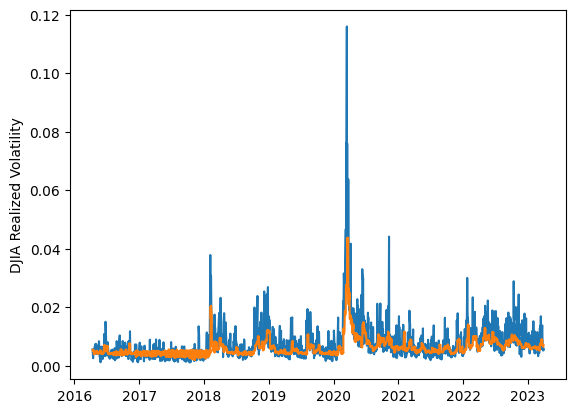

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("DJIA Realized Volatility")

# H=10 Forecasts

In [ ]:
Accuracy=[]
RMSE=[]
Quasilikelihood=[]

In [ ]:
for m in range (13):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 2
  n_input = 84
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=6, dilations=[1,2,4,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(10))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=10)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(int(len(test)/10)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,10:,:],[a[j*10:(j+1)*10]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  true_predictions=true_predictions.reshape(1750,1)
  test=test[:1750]
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/10
126/126 [==============================] - 6s 9ms/step - loss: 0.0703 - accuracy: 0.1524 - mean_absolute_error: 0.0703
Epoch 2/10
126/126 [==============================] - 1s 9ms/step - loss: 0.0333 - accuracy: 0.1996 - mean_absolute_error: 0.0333
Epoch 3/10
126/126 [==============================] - 1s 9ms/step - loss: 0.0313 - accuracy: 0.2041 - mean_absolute_error: 0.0313
Epoch 4/10
126/126 [==============================] - 1s 9ms/step - loss: 0.0304 - accuracy: 0.1906 - mean_absolute_error: 0.0304
Epoch 5/10
126/126 [==============================] - 1s 9ms/step - loss: 0.0299 - accuracy: 0.1996 - mean_absolute_error: 0.0299
Epoch 6/10
126/126 [==============================] - 1s 9ms/step - loss: 0.0299 - accuracy: 0.2158 - mean_absolute_error: 0.0299
Epoch 7/10
126/126 [==============================] - 1s 11ms/step - loss: 0.0301 - accuracy: 0.0526 - mean_absolute_error: 0.0301
Epoch 8/10
126/126 [==============================] - 1s 10ms/step - loss: 0.0296 - accur

In [ ]:
RMSE

[0.0029441134897317815,
 0.0029266494986027397,
 0.0029685156745035174,
 0.002958562016762428,
 0.0029612333716555637,
 0.0029081043202792718,
 0.0032031599959657596,
 0.0029755186361743145,
 0.00296768977779238,
 0.002944550145288404,
 0.002940289267014095,
 0.00293386862321062,
 0.002915816770311405,
 0.002987304300575669,
 0.0029632623082975745]

In [ ]:
Accuracy

[59.24506110189029,
 59.41409274240392,
 54.929799511552005,
 58.341055972832564,
 59.36617976461635,
 59.33169078894417,
 52.663735887898675,
 56.05671816784369,
 57.712512075598795,
 59.60038211555443,
 56.73900162215296,
 59.971231597582964,
 59.95960502257736,
 54.83160589129745,
 57.58841376981538]

In [ ]:
Quasilikelihood

[0.12350867728654324,
 0.1211124581653238,
 0.13577058252873359,
 0.12425344992388769,
 0.123483035902935,
 0.1206115661152508,
 0.1455032516089626,
 0.1320711867014764,
 0.12840741122575391,
 0.12266737979520369,
 0.12923355195823527,
 0.12189909949111696,
 0.11952942083109079,
 0.136382396281525,
 0.1281815528058935]

Text(0, 0.5, 'DJIA Realized Volatility')

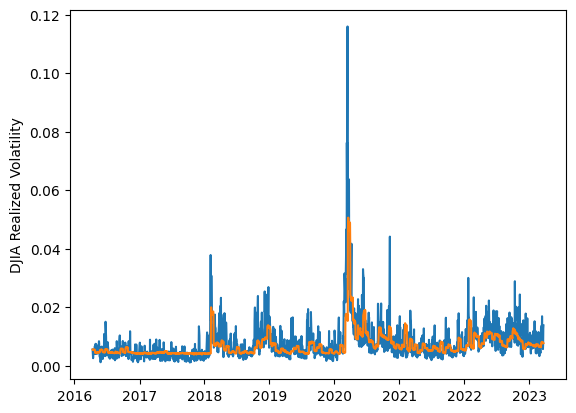

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("DJIA Realized Volatility")

# H=22 Forecasts

In [ ]:
Accuracy=[]
RMSE=[]
Quasilikelihood=[]

In [ ]:
for m in range (14):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 2
  n_input = 84
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=6, dilations=[1,2,4,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(22))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=10)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(int(len(test)/22)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,22:,:],[a[j*22:(j+1)*22]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  true_predictions=true_predictions.reshape(1738,1)
  test=test[:1738]
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/10
126/126 [==============================] - 6s 9ms/step - loss: 0.0659 - accuracy: 0.0242 - mean_absolute_error: 0.0659
Epoch 2/10
126/126 [==============================] - 1s 9ms/step - loss: 0.0338 - accuracy: 0.0120 - mean_absolute_error: 0.0338
Epoch 3/10
126/126 [==============================] - 1s 9ms/step - loss: 0.0321 - accuracy: 0.0165 - mean_absolute_error: 0.0321
Epoch 4/10
126/126 [==============================] - 1s 11ms/step - loss: 0.0313 - accuracy: 0.0192 - mean_absolute_error: 0.0313
Epoch 5/10
126/126 [==============================] - 1s 9ms/step - loss: 0.0305 - accuracy: 0.0212 - mean_absolute_error: 0.0305
Epoch 6/10
126/126 [==============================] - 1s 9ms/step - loss: 0.0302 - accuracy: 0.0187 - mean_absolute_error: 0.0302
Epoch 7/10
126/126 [==============================] - 1s 9ms/step - loss: 0.0299 - accuracy: 0.0127 - mean_absolute_error: 0.0299
Epoch 8/10
126/126 [==============================] - 1s 9ms/step - loss: 0.0293 - accura

In [ ]:
RMSE

[0.0032156758908842256,
 0.003417183539441371,
 0.0034351242924320832,
 0.0033547658058226348,
 0.0034299029175633637,
 0.0033308412580316665,
 0.0035707908087268766,
 0.0032334232621928035,
 0.0033215001167320756,
 0.0035905989235408163,
 0.003237894915325723,
 0.003571504081612644,
 0.0037844801736999995,
 0.003341594227081343,
 0.0033280534522435426]

In [ ]:
Accuracy

[55.81276812563283,
 53.94346802253378,
 48.78962496123008,
 55.1467551971713,
 53.14756931747324,
 59.28497661670136,
 50.78039576207093,
 55.43888656048388,
 54.54840839705655,
 48.45406335887928,
 58.21054820095046,
 49.938657813035256,
 46.020116866625784,
 56.43525177301003,
 54.55591288566553]

In [ ]:
Quasilikelihood

[0.14171450814585795,
 0.15072363389059532,
 0.1652468297979169,
 0.14539955970783927,
 0.1509581451802907,
 0.13622139478280426,
 0.1611882022685954,
 0.1417187277247055,
 0.14857397750728296,
 0.16719564317488914,
 0.13628617557321182,
 0.16324246397294453,
 0.1796915634723472,
 0.14238622509013157,
 0.14827667138501624]

Text(0, 0.5, 'DJIA Realized Volatility')

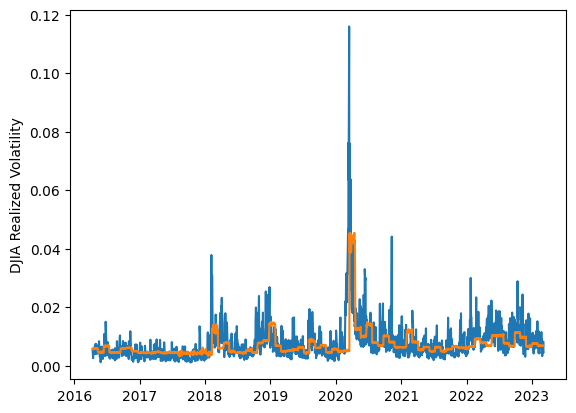

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("DJIA Realized Volatility")